This notebook
* starts with the equation of a line through the origin and how that leads to simple linear regression (OLS)
* extends simple linear regression to multiple features, aka multiple linear regression
* shows how to use part of the linear regression (the weighted sum) plus a sigmoid function to build a classifier, the logistic regression classifier
* how to go from there to the Perceptron, the building block of neural networks
* in the last section, we talk about other linear models

In [1]:
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import scipy

In [4]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
filepath = './data/'

# supervised learning - linear models

Linear models make a prediction using a linear function of the input features

There's a lot of them

https://scikit-learn.org/dev/api/sklearn.linear_model.html

here i will include:
* regression
    * `Linear regression`: Ordinary least squares Linear Regression
        * simple linear regression
        * multiple linear regression
    * `Ridge regression`: Linear least squares with l2 regularization
    * regressors with variable selection
        * `Lasso`: Linear Model trained with L1 prior as regularizer
        * `ElasticNet`: Linear regression with combined L1 and L2 priors as regularizer
* classification
    * `Logistic regression` classifier
    * `Perceptron`: Linear perceptron classifier
    * `Ridge classifier`: classifier using Ridge regression

## OLS linear regression

Ordinary least squares Linear Regression
* a regression model
* which is linear
* and uses the `Ordinary least squares, OLS` method

Two variants:
* `simple linear regression, SLR` - when there's only one feature
* `multiple linear regression, MLR` - when there's more/multiple

### `simple linear regression`

* https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing

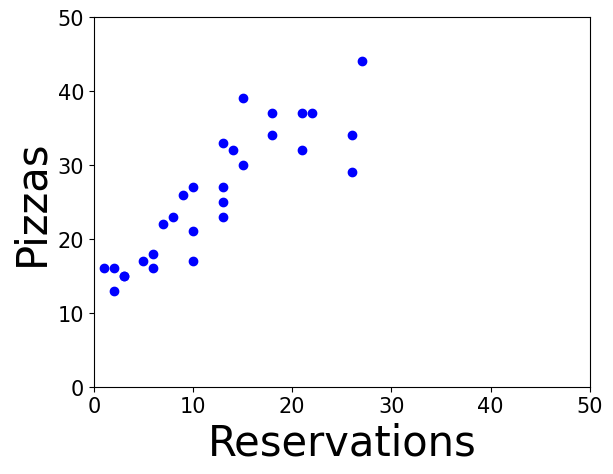

In [213]:
# eg. predict the number of pizzas clients will order based on the number of reservations
x, y = np.loadtxt(filepath + "pizza.txt", skiprows=1, unpack=True)

plt.axis([0, 50, 0, 50]) # scale axes (0 to 50)
plt.xticks(fontsize=15) # set x axis ticks
plt.yticks(fontsize=15) # set y axis ticks
plt.xlabel("Reservations", fontsize=30) # set x axis label
plt.ylabel("Pizzas", fontsize=30) # set y axis label
plt.plot(x, y, "bo") # plot data
plt.show()

`Simple linear regression` (SLR) is a linear regression model with a single explanatory variable.

The model function describes a line

$y = \alpha + \beta x$

with `slope` $\beta$ and `y-intercept` $\alpha$

In general, such a relationship may not hold exactly for the largely unobserved population of values of the independent and dependent variables; we call the unobserved deviations from the above equation the errors.

Suppose we observe n data pairs and call them $\{(x_i, y_i), i = 1, \ldots, n\}$. We can describe the underlying relationship between $y_i$ and $x_i$ involving this `error` term $\epsilon_i$ by

$y_i = \alpha + \beta x_i + \epsilon_i$

This relationship between the true (but unobserved) underlying parameters α and β and the data points is called a `linear regression model`.

The goal is to find estimated values $\widehat{\alpha}$ and $\widehat{\beta}$ for the parameters $\alpha$ and $\beta$ which would provide the "best" fit in some sense for the data points.

After finding them, the model will make a prediction $\widehat{y_i} = \widehat{\alpha} + \widehat{\beta} x_i$

Now, what the "best" fit (best values of the parameters found) will be depend on the method used to find it. 

Each possible line, for each candidate parameter values $\alpha$ and $\beta$ will have an error for each data point $i$ of $\widehat{\epsilon_i} = y_i - \widehat{y_i} = y_i - (\alpha + \beta x_i) $, also called a `residual`. (in this notation, we reserve the hat symbol for the final parameter values after optimizing)

The typical method used is the `ordinary least squares, OLS method`. With this method:
* the `loss function` or `error function` is a function that measures the error for a single data point $i$. In linear regression, the loss function typically used is the squared error for each individual data point: $L(y_i, \widehat{y_i}) = (y_i - \widehat{y_i})^2$. This loss function is squared to avoid negative values and to penalize larger errors more severely.
* the `objective function` or `cost function` is what we want to minimize (or maximize, but usually minimize) during the model training process. Usually we define it as the average (or sum) of the loss function applied across all the data points. In other words, the objective function is the aggregation of the loss functions over the dataset. In the OLS sense, the "best" fit will be a line that minimizes the `sum of squared residuals/errors, SSE`. In math notation, we want to minimize $\sum_i^n L(y_i, \widehat{y_i}) = \sum_i^n\widehat{\epsilon_i}^2$. We call the function we want to minimize the objective function $\mathcal{Q}(\alpha, \beta) = \sum_i^n L(y_i, \widehat{y_i}) = \sum_i^n \widehat{\epsilon_i}^2 = \sum_i^n (y_i - \alpha - \beta x_i)^2$. In other words, to find $\widehat{\alpha}$ and $\widehat{\beta}$ we need to solve the following minimization problem $(\widehat{\alpha}, \widehat{\beta}) = \text{argmin} \; \mathcal{Q}(\alpha, \beta)$. Another common notation is $\mathcal{Q}(\alpha, \beta) = \mathcal{J}(\theta)$

**a line though the origin**

This is quite a mouthful, so let's consider the simplest case first, in which the model is a line that passes through the origin

$y = x \; w$

i renamed the slope $\beta$ to `weight` $w$

eg. if $\widehat{w} = 2$, for a value of $x=10$ reservations we predict $\hat{y} = \widehat{w} \; x = 2 \times 10 = 20$ pizzas ordered

This model has 1 parameter $w$. We want to optimize it so the model gives the best predictions possible. We can give it a value for now

In [214]:
# takes the input variable and the weight, and it uses them to calculate the predictions y^
def predict(x, w):
    return x * w

In [215]:
# if w = 2.1 and we have 20 reservations, how many pizzas do we predict the clients will order?
w = 2
x_ = 10
y_hat = predict(x_, w)
y_hat # we predict 42 pizzas

20

How do we evaluate the model performance? We need a test dataset

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
# fetching some test data seems kinda dumb because we haven't trained, we just guessed a value for w
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=0) # 70% test

In [218]:
x_test

array([14., 13., 22.,  3.,  5., 10.,  6., 21., 10.,  8.,  1.,  6., 26.,
        2., 15.,  9.,  2., 13., 18., 13., 18.])

In [219]:
y_test

array([32., 25., 37., 15., 17., 27., 18., 32., 21., 23., 16., 16., 29.,
       13., 39., 26., 16., 23., 34., 27., 37.])

and now we make predictions on all these $x$ values

In [220]:
y_pred = predict(x_test, w)
y_pred

array([28., 26., 44.,  6., 10., 20., 12., 42., 20., 16.,  2., 12., 52.,
        4., 30., 18.,  4., 26., 36., 26., 36.])

notice that even tho the function was meant for a number $x$ (a 0-dimensional input), it works with the case of an array $\mathbf{x}$ (a 1-dimensional input)

If the input is a array instead of a single number we can denote it as $\mathbf{x}$ (a vector column). The weight $w$ is still just a number and the output will be the array of predictions $\hat{\mathbf{y}}$ (a vector column)

$\hat{\mathbf{y}} = \mathbf{x} \; w$

and rename the function

In [221]:
# x_bar can be either a single number, or an entire array of reservations
def predict(x_bar, w):
    return x * w

However, if there's more than a single feature, the input will be a matrix $\mathbf{X}_{n,p}$ with $n$ rows and $p$ columns/features.
The weight will be a row vector $\mathbf{w}_{p, 1}$ (each feature will have a corresponding weight) and the output will be a column vector of predictions $\hat{\mathbf{y}}$

To take this into account and make things more general, in the code we can use the notation
* matrices will be in uppercase
* vectors or numbers will be lowercase

In [222]:
def predict(X, w):
    return X * w

In [223]:
y_pred = predict(x_test, w)
y_pred

array([28., 26., 44.,  6., 10., 20., 12., 42., 20., 16.,  2., 12., 52.,
        4., 30., 18.,  4., 26., 36., 26., 36.])

and we evaluate the regression performance

In [224]:
r_squared(y_test, y_pred)

np.float64(-0.18691012051691613)

This model is bad. A negative $R^2$ implies that the model's predictions are worse than a horizontal line (a model that just predicts the mean of $y_\text{true}$

This model corresponds to this line

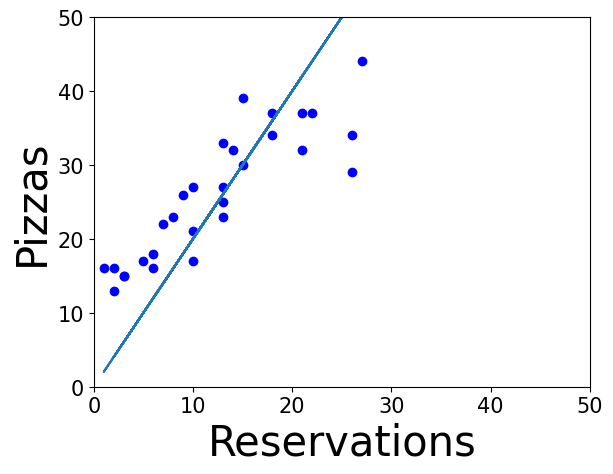

In [225]:
y_hat = predict(x, w)

plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Pizzas", fontsize=30)
plt.plot(x, y, "bo")

plt.plot(x, y_hat) # <----- Show the predicted line (model)
plt.show()

We need to make adjustements to the values of the parameters (here, $w$) so that the model performance improves. That is, we need to implement the training phase of the algorithm
* predicting a value is the "`prediction phase`" of ML
* the `training phase` is where we build the model, in this case where we optimize the value of the parameter $w$

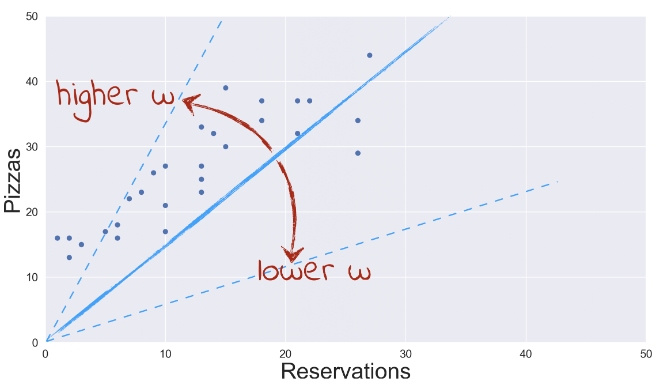

**loss function**

a `loss function` or `error function` is a function that takes computes the error for each example

In [226]:
def squared_error_loss(y_true, y_pred):
    """
    Compute the squared error loss for a single data point.
    
    Parameters:
    y_true : float : Actual value
    y_pred : float : Predicted value
    
    Returns:
    float : Squared error for this data point
    """
    return (y_true - y_pred) ** 2

**objective function**

a `objective` or `cost function` is a function that takes all the examples/data (X and y) and measures the "line's error" as a whole. The better the line approximates the examples, the lower the error.

In [227]:
#def sse_objective_function(X, y, alpha, beta):
def sse_objective_function(X, y, w):
    """
    Compute the objective function (sum of squared errors) for linear regression.
    
    Parameters:
    X : array-like : Independent variable (input data)
    y : array-like : Dependent variable (true target values)
    alpha : float : Intercept of the line
    beta : float : Slope of the line
    
    Returns:
    float : Sum of squared errors for all data points
    """
    n = len(y)
    total_error = 0
    
    for i in range(n):
        # y_pred = alpha + beta * X[i]  # Predicted value for data point i
        y_pred = predict(X[i], w)  # Predicted value for data point i
        total_error += squared_error_loss(y[i], y_pred)  # Accumulate squared error
    
    return total_error

In [228]:
# Sample data (simple 1D case)
X = np.array([1, 2, 3, 4, 5])  # Independent variable (input)
y = np.array([2, 3, 4, 5, 6])  # Dependent variable (true values)

# Initial guesses for parameters
# alpha = 1.0  # Intercept
beta = 1.0   # Slope

# Compute the sum of squared errors
# sse = objective_function(X, y, alpha, beta)
sse = sse_objective_function(X, y, beta)
print("Sum of Squared Errors (Objective Function):", sse)

Sum of Squared Errors (Objective Function): 5.0


That said, this distinction between outter (objective) or inner (loss) functions doesn't really matter and makes the code worse. We will combine the two and just call it the loss function

In [229]:
def loss(X, y, w):
    y_pred = predict(X, w)  # predicted values for all data points
    errors = y - y_pred  # residuals
    squared_errors = errors ** 2  # squared errors
    return np.sum(squared_errors)  # sum of squared errors

we can create a function for the SSE

In [230]:
def my_sse(y_true, y_pred):
    errors = y_true - y_pred  # residuals, ei = yi^ - yi
    squared_errors = errors ** 2  # squared errors, ei^2
    return np.sum(squared_errors)  # sum of squared errors

In [231]:
def loss(X, y, w):
    y_pred = predict(X, w)
    sse = my_sse(y, y_pred)
    return sse

or we can use the MSE instead of the SSE

In [232]:
def my_mse(y_true, y_pred):
    errors = y_true - y_pred
    squared_errors = errors ** 2
    return np.mean(squared_errors)  # mean of squared errors

In [233]:
def loss(X, y, w):
    y_pred = predict(X, w)
    mse = my_mse(y, y_pred)
    return mse

The goal is to find the value of $w$ that minimize the objective function. You can use optimization algorithms like gradient descent or use libraries like SciPy to solve this minimization problem.

In [234]:
# goes over the examples over and over, until it learns how to approximate them.
def train(X, y, iterations, lr): # number of iterations, learning rate
    w = 0
    for i in range(iterations):
        current_loss = loss(X, y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))
        if loss(X, y, w + lr) < current_loss:
            w += lr
        elif loss(X, y, w - lr) < current_loss:
            w -= lr
        else:
            return w
    raise Exception("Couldn't converge within %d iterations" % iterations)

Each iteration starts by calculating the current loss. Then it considers an alternative line—the one that you get when
you increase w by a small amount. We could call that amount the "`step size`" but in this code I borrowed a term from machine learning, and called it the `learning rate, lr` for short.
We just added the learning rate to w, that results in a new line. Does this new line result in a lower loss than our current line? If so, then w + lr becomes the new current w, and the loop continues. Otherwise, the algorithm tries another line: w - lr. Once again, if that line results in a lower loss than the current w, the code updates w and continues the loop. If neither w + lr nor w - lr yield a better loss than the current w, then we're done.

In [235]:
# Train the model
w = train(x_train, y_train, iterations=10000, lr=0.01) # guess values for 'iterations' and 'lr'

Iteration    0 => Loss: 1116.555556
Iteration    1 => Loss: 1104.876967
Iteration    2 => Loss: 1093.263422
Iteration    3 => Loss: 1081.714922
Iteration    4 => Loss: 1070.231467
Iteration    5 => Loss: 1058.813056
Iteration    6 => Loss: 1047.459689
Iteration    7 => Loss: 1036.171367
Iteration    8 => Loss: 1024.948089
Iteration    9 => Loss: 1013.789856
Iteration   10 => Loss: 1002.696667
Iteration   11 => Loss: 991.668522
Iteration   12 => Loss: 980.705422
Iteration   13 => Loss: 969.807367
Iteration   14 => Loss: 958.974356
Iteration   15 => Loss: 948.206389
Iteration   16 => Loss: 937.503467
Iteration   17 => Loss: 926.865589
Iteration   18 => Loss: 916.292756
Iteration   19 => Loss: 905.784967
Iteration   20 => Loss: 895.342222
Iteration   21 => Loss: 884.964522
Iteration   22 => Loss: 874.651867
Iteration   23 => Loss: 864.404256
Iteration   24 => Loss: 854.221689
Iteration   25 => Loss: 844.104167
Iteration   26 => Loss: 834.051689
Iteration   27 => Loss: 824.064256
Iteration

the parameters that don't belong to the model (here, other than $\alpha$/$b$ and $\beta$/$w$) but that need to be decided for training the model (here, `iterations` and `lr`, are called `hyperparameters`

the expectation is that the value of the loss function will decrease in each iteration

In [236]:
w # optimized value of w we found

1.8000000000000014

In [237]:
print("w=%.3f" % w)

w=1.800


In [238]:
# Predict the number of pizzas for 20 reservations
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))

Prediction: x=20 => y=36.00


**adding a bias**

add the other parameter to the model, y-intercept $\alpha$, here renamed to `bias` $b$ so that

$\widehat{y} = w \; x + b$

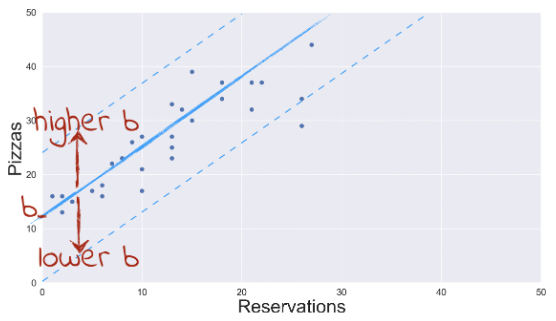

In [239]:
def predict(X, w, b):
    return X*w + b

In [240]:
def loss(X, y, w, b):
    y_pred = predict(X, w, b)
    mse = my_mse(y, y_pred)
    return mse

In [241]:
def train(X, y, iterations, lr):
    w = 0
    b = 0 # <--------------------------------------------------------
    for i in range(iterations):
        current_loss = loss(X, y, w, b)
        # print("Iteration %4d => Loss: %.6f" % (i, current_loss))
        if loss(X, y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, y, w, b + lr) < current_loss: # <--------------------------------------------------------
            b += lr
        elif loss(X, y, w, b - lr) < current_loss: # <--------------------------------------------------------
            b -= lr
        else:
            return w, b # <--------------------------------------------------------
    raise Exception("Couldn't converge within %d iterations" % iterations)

In [242]:
w, b = train(x_train, y_train, iterations=10000, lr=0.01)

In [243]:
print("w=%.3f, b=%.3f" % (w, b))

w=1.220, b=11.790


In [244]:
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Prediction: x=20 => y=36.19


**a better optimization algorithm - gradient descent**

* the algorithm used in the train() function is not good enough
    * the search looks at w and b in isolation and looks at every combination
    * the step size (learning rate) is always the same

At each iteration, this algorithm tweaks either w or b, looking for the values that minimize the loss. Here is one way in which that approach could go
wrong: as we tweak w, we might be increasing the loss caused by b, and the other way around. To avoid that problem and get as close as possible to the
minimum loss, we should tweak both parameters at once. The more parameters we have, the more important it is to tweak them all at the same time.
To tweak w and b together, we'd have to try all the possible combinations of tweaks: increase w and b; increase w and decrease b; increase w and leave b unchanged; decrease w and… well, you get the point. Later we'll use models with hundreds of thousands of parameters. With such large models, an algorithm that tries every combination of parameters is never going to fly.
It tweaks parameters in increments that are equal to the learning rate. If lr is large, then the parameters change quickly, which speeds up training—but the final result is less precise, because each parameter has to be a multiple of that large lr. To increase precision, we need a small lr, which results in even slower training.

* a better optimization algorithm is `gradient descent`

the loss() function computes

$L = \frac{1}{n} \sum_i^n ((w \; x_i + b) - y_i)^2$

with gradient descent you calculate the gradient of the loss function $\nabla{}L$ (the partial derivative with respect to each parameter) and use it to adjust the parameter values
$$
\nabla{}L(w,b) = (\frac{\partial L}{\partial w}, \frac{\partial L}{\partial b})
$$

Calculating the partial derivatives, the results are

$\frac{\partial L}{\partial w} = \frac{2}{n} \sum_i^n x_i(w \; x_i + b - y_i)$

and

$\frac{\partial L}{\partial b} = \frac{2}{n} \sum_i^n (w \; x_i + b - y_i)$

The partial derivative is a value that is higher when the change the in parameter causes an increase in the function

In [245]:
# gradient descent without bias
def gradient(X, y, w):
    return 2 * np.mean(X * (predict(X, w, 0) - y)) # this is dL/dw

def train(X, y, iterations, lr):
    w = 0
    for i in range(iterations):
        # print("Iteration %4d => Loss: %.10f" % (i, loss(X, y, w, 0)))
        w -= gradient(X, y, w) * lr
    return w

The gradient is a vector that points in the direction of maximum increase of the function. So, if we want to minimize the function, we need to update the parameters to go agaisnt the gradient direction

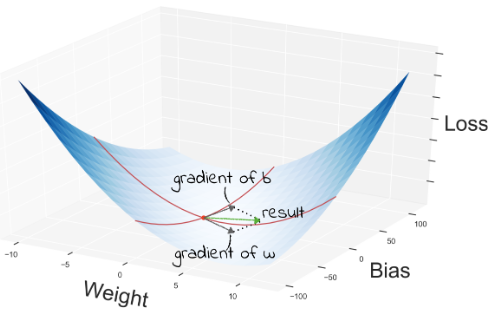

In [246]:
# complete gradient descent

In [247]:
def predict(X, w, b):
    return X*w + b

In [248]:
def loss(X, y, w, b): # not actually being used. We just use the derivative of this function in gradient()
    return np.mean((predict(X, w, b) - y) ** 2)

In [249]:
def gradient(X, y, w, b):
    w_gradient = 2 * np.mean(X * (predict(X, w, b) - y)) # dL/dw
    b_gradient = 2 * np.mean(predict(X, w, b) - y) # dL/db
    return (w_gradient, b_gradient)

In [250]:
def train(X, y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        # print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b

In [251]:
w, b = train(x_train, y_train, iterations=20000, lr=0.001)

In [252]:
print("w=%.10f, b=%.10f" % (w, b))

w=1.2027079694, b=12.0667180320


In [253]:
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Prediction: x=20 => y=36.12


* gradient descent can still fail. It works well if the loss function:
    * is `convex` (meaning that it doesn't have bumps that result in local minima)
    * is `continuous` (meaning that it doesn't have vertical cliffs or gaps)
    * is `differentiable` (meaning that it's smooth, without cusps and other weird spots where you cannot even calculate a derivative)

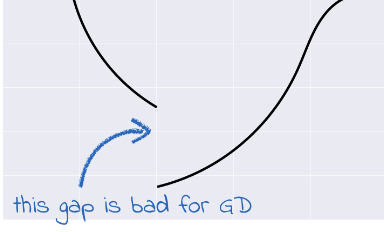 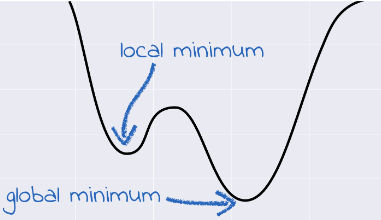

**compare with sklearn**

In [254]:
from sklearn.linear_model import LinearRegression

In [255]:
X, y = make_wave(n_samples=60)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [257]:
lr = LinearRegression()
lr

LinearRegression()

In [258]:
lr.fit(X_train, y_train)

LinearRegression()

In [259]:
dir(lr)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'g

The "slope" parameters (w), also called weights or coefficients, are stored in the `coef_` attribute, while the offset or intercept (b) is stored in the `intercept_` attribute

In [260]:
lr.coef_

array([0.39390555])

In [261]:
lr.intercept_

np.float64(-0.031804343026759746)

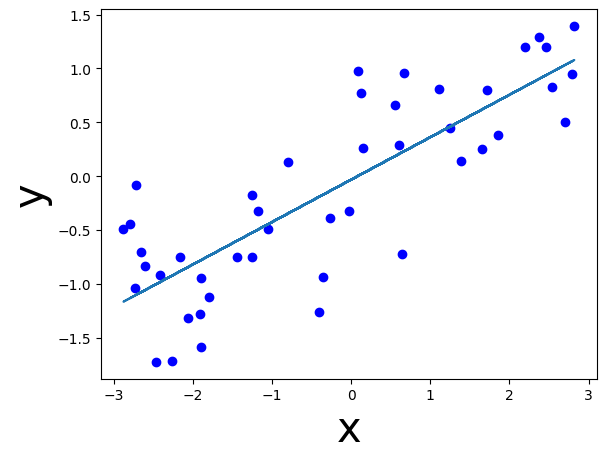

In [262]:
plt.xlabel("x", fontsize=30)
plt.ylabel("y", fontsize=30)
plt.plot(X_train, y_train, "bo")

plt.plot(X_train, lr.coef_[0]*X_train + lr.intercept_) # <----- Show the predicted line (model)
plt.show()

In [263]:
# Training set score
lr.score(X_train, y_train)

0.6700890315075756

In [264]:
# Test set score
lr.score(X_test, y_test)

0.65933685968637

this is the optimal value obtainable using simple linear regression

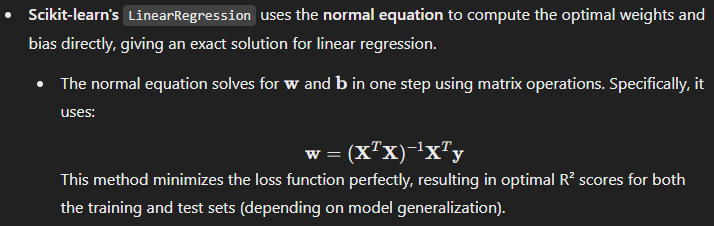

In [269]:
# without sklearn
w, b = train(X_train, y_train, iterations=20000, lr=0.001)

print("w=%e, b=%f" % (w, b))

# predictions on training dataset
y_pred = predict(X_train, w, b)
print('Train set score - R^2 = %f' % r_squared(y_train, y_pred))

# predictions on test dataset
y_pred = predict(X_test, w, b)
print('Test set score - R^2 = %f' % r_squared(y_test, y_pred))

w=6.253418e-16, b=-0.151124
Train set score - R^2 = -44.000000
Test set score - R^2 = -14.017726


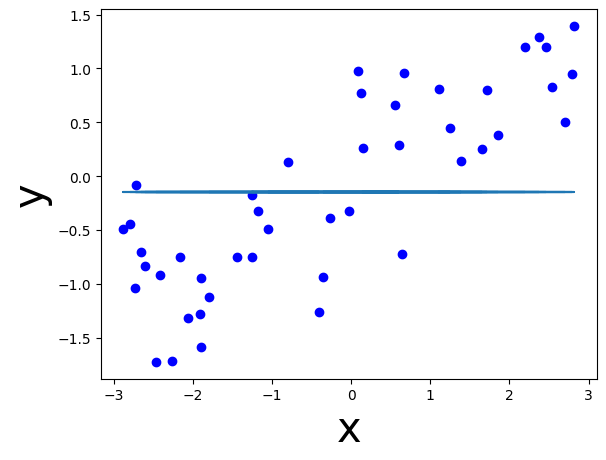

In [266]:
plt.xlabel("x", fontsize=30)
plt.ylabel("y", fontsize=30)
plt.plot(X_train, y_train, "bo")

plt.plot(X_train, w*X_train + b) # <----- Show the predicted line (model)
plt.show()

here we are very far from the optimal solution and the $w$ got stuck at zero for some reason. We can try looking for better parameters and looking at prints from the algorithm.

I asked the AI and the algorithm seems ok. It gave me this improved version, with the following changes
* implement feature scaling: scale your features to have zero mean and unit variance
* implement early stopping: stop training when the improvement in loss falls below a certain threshold

In [271]:
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_wave(n_samples=60)
X = X.flatten()

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Manual Gradient Descent Implementation
def predict(X, w, b):
    return X * w + b

def gradient(X, y, w, b):
    error = predict(X, w, b) - y
    w_gradient = 2 * np.mean(X * error)
    b_gradient = 2 * np.mean(error)
    return w_gradient, b_gradient

def train(X, y, iterations, lr, tol=1e-6, print_every=5000):
    w = b = 0
    previous_loss = float('inf')
    for i in range(iterations):
        w_gradient, b_gradient = gradient(X, y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
        
        if (i+1) % print_every == 0:
            current_loss = np.mean((predict(X, w, b) - y) ** 2)
            print(f"Iteration {i+1}: Loss = {current_loss}")
            if abs(previous_loss - current_loss) < tol:
                print("Convergence reached.")
                break
            previous_loss = current_loss
    return w, b

# Train the model
w_manual, b_manual = train(X_train, y_train, iterations=100000, lr=0.01, print_every=10000)

print(f"Manual Implementation: w = {w_manual:.10f}, b = {b_manual:.10f}")

# Predictions and R² Scores
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Training set
y_pred_train = predict(X_train, w_manual, b_manual)
print('Manual Train set score - R² = %.6f' % r_squared(y_train, y_pred_train))

# Test set
y_pred_test = predict(X_test, w_manual, b_manual)
print('Manual Test set score - R² = %.6f' % r_squared(y_test, y_pred_test))

# Using scikit-learn for comparison
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train.reshape(-1, 1), y_train)
print(f"Sklearn Implementation: w = {lr_sklearn.coef_[0]:.10f}, b = {lr_sklearn.intercept_:.10f}")

# Scikit-learn R² Scores
print('Sklearn Train set score - R² = %.6f' % lr_sklearn.score(X_train.reshape(-1, 1), y_train))
print('Sklearn Test set score - R² = %.6f' % lr_sklearn.score(X_test.reshape(-1, 1), y_test))

Iteration 10000: Loss = 0.2559202568137129
Iteration 20000: Loss = 0.2559202568137129
Convergence reached.
Manual Implementation: w = 0.7158232719, b = -0.1086141072
Manual Train set score - R² = 0.670089
Manual Test set score - R² = 0.659337
Sklearn Implementation: w = 0.7158232719, b = -0.1086141072
Sklearn Train set score - R² = 0.670089
Sklearn Test set score - R² = 0.659337


so from this we can see it was not even a problem with the choice of hyperparameters. The pre-processing, in particular, the scaling of the inputs, is crucial to prevent parameters from being "overshadowed" by others and going to 0!

### `multiple linear regression`

**2 features**

if i have 2 features, i need to change the model to be a prediction based on a linear combination of these 2 variables

$\widehat{y} = w_1 \; x_1 + w_2 \; x_2 + b$

there's 2 inputs/features and a weight for each one $w_1$ and $w_2$, and the bias $b$ that shifts the plane vertically

In [47]:
x1, x2, y = np.loadtxt(filepath + "pizza_2_vars.txt", skiprows=1, unpack=True)

In [34]:
print('x1=', x1) # reservations
print('x2=', x2) # temperature

x1= [13.  2. 14. 23. 13.  1. 18. 10. 26.  3.  3. 21.  7. 22.  2. 27.  6. 10.
 18. 15.  9. 26.  8. 15. 10. 21.  5.  6. 13. 13.]
x2= [26. 14. 20. 25. 24. 12. 23. 18. 24. 14. 12. 27. 17. 21. 12. 26. 15. 21.
 18. 26. 20. 25. 21. 22. 20. 21. 12. 14. 19. 20.]


In [40]:
x1.shape # => (30, )
# the dangling comma means the array as 1 dimension

(30,)

In [37]:
# Create the feature matrix X by stacking x1 and x2 as columns
X = np.column_stack((x1, x2))
X[:5]

array([[13., 26.],
       [ 2., 14.],
       [14., 20.],
       [23., 25.],
       [13., 24.]])

In [41]:
X.shape # => (30, 2)
# 30 examples, 2 dimensions/features

(30, 2)

In [48]:
y.shape # => (30, )

(30,)

In [49]:
# y's shape is (30, ) but i should avoid mixing 1D arrays with matrices
# i want a shape (30, 1)
y = y.reshape(-1, 1)
y[:5]

array([[44.],
       [23.],
       [28.],
       [60.],
       [42.]])

The equation for this model defines the plane that best fits this data

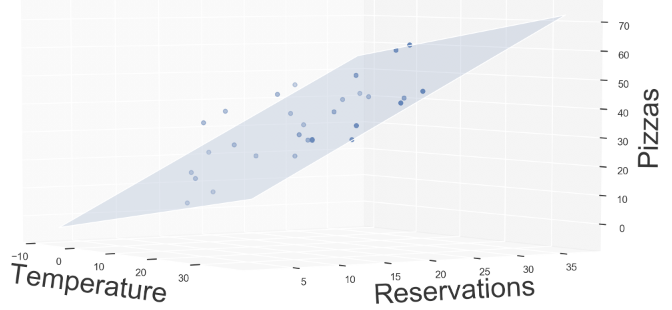

**3 features**

If we now add another feature, the model becomes $\widehat{y} = w_1 \; x_1 + w_2 \; x_2 + w_3 \; x_3 + b$

In [57]:
x1, x2, x3, y = np.loadtxt(filepath + "pizza_3_vars.txt", skiprows=1, unpack=True)

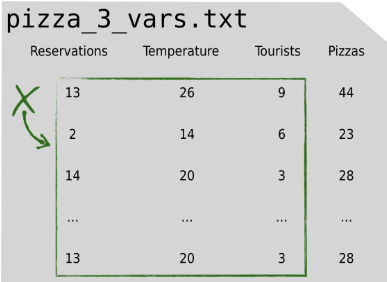

In [58]:
X = np.column_stack((x1, x2, x3))
X[:3]

array([[13., 26.,  9.],
       [ 2., 14.,  6.],
       [14., 20.,  3.]])

In [59]:
y = y.reshape(-1, 1)
y[:5]

array([[44.],
       [23.],
       [28.],
       [60.],
       [42.]])

**without the bias**

we can group the features in the feature matrix $X_{n \times 3} = [x_1, x_2, x_3]$ and the weights in the weights vector $w_{3 \times 1} = [w_1, w_2, w_3]^T$.

and implement the simpler model $y = w_1 \; x_1 + w_2 \; x_2 + w_3 \; x_3 = [x_1, x_2, x_3] \; [w_1, w_2, w_3]^T = X w $

In [60]:
# w needs to be a column vector with a element for each feature vector in X
w = np.zeros((X.shape[1], 1))
w

array([[0.],
       [0.],
       [0.]])

the multiplications involved will be matrix multiplications now

In [84]:
def predict(X, w):
    # return X * w
    res = np.matmul(X, w) # matrix multiplication
    return res

In [85]:
# we just removed the bias
def loss(X, y, w):
    return np.mean((predict(X, w) - y) ** 2)
# this returns a scalar
# => ()

In [86]:
# previous gradient without bias (here for comparison)
def gradient(X, y, w):
    return 2 * np.mean(X * (predict(X, w, 0) - y)) # this is dL/dw

# matrix-based version of the gradient without bias
def gradient(X, y, w):
    return 2 * np.matmul(X.T, (predict(X, w) - y)) / X.shape[0]

In [87]:
def train(X, y, iterations, lr, print_every=5000):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        w -= gradient(X, y, w) * lr
        
        if (i+1) % print_every == 0:
            print(f"Iteration {i+1}: Loss = {loss(X, y, w)}")
    return w

In [72]:
w = train(X, y, iterations=100000, lr=0.001)

Iteration 5000: Loss = 6.895761331467839
Iteration 10000: Loss = 6.895761331467839
Iteration 15000: Loss = 6.895761331467839
Iteration 20000: Loss = 6.895761331467839
Iteration 25000: Loss = 6.895761331467839
Iteration 30000: Loss = 6.895761331467839
Iteration 35000: Loss = 6.895761331467839
Iteration 40000: Loss = 6.895761331467839
Iteration 45000: Loss = 6.895761331467839
Iteration 50000: Loss = 6.895761331467839
Iteration 55000: Loss = 6.895761331467839
Iteration 60000: Loss = 6.895761331467839
Iteration 65000: Loss = 6.895761331467839
Iteration 70000: Loss = 6.895761331467839
Iteration 75000: Loss = 6.895761331467839
Iteration 80000: Loss = 6.895761331467839
Iteration 85000: Loss = 6.895761331467839
Iteration 90000: Loss = 6.895761331467839
Iteration 95000: Loss = 6.895761331467839
Iteration 100000: Loss = 6.895761331467839


**with the bias**

we can now add the bias to the model $y = w_1 \; x_1 + w_2 \; x_2 + w_3 \; x_3 + b = X w + b$

However, we can make the code more general and concise, by thinking of the bias $b$ as just the weight of an input variable that happens to have the constant value $1$. That input variable that will always be 1 is a `dummy input variable` $x_0$ and this allows us to rewrite the model as $y = w_1 \; x_1 + w_2 \; x_2 + w_3 \; x_3 + b \times 1 = w_1 \; x_1 + w_2 \; x_2 + w_3 \; x_3 + b \times x_0$

Now, redefining the weights vector to be $w_{4 \times 1} = [b, w_1, w_2, w_3]^T$ and $X_{n \times 4} = [\mathbb{1}, x_1, x_2, x_3]$, then $y = X w$ again. The $\mathbb{1}$ is a column of $1$s

* The bias is just the weight of an input variable that happens to have the constant value 1.
So, here's the trick I was talking about: we can add a dummy input variable with the constant value 1, and we won’t need an explicit bias anymore.

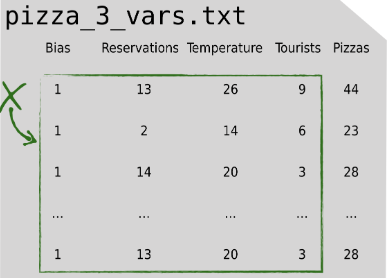

We could add this constant input variable by including a column of 1s in the dataset but it's generally a good idea to avoid messing with the original data. Instead, let's insert a column of ones into X after we load the data. The position of this bias column doesn't really matter, but it's a common convention to insert it as the first column

In [73]:
x1, x2, x3, y = np.loadtxt(filepath + "pizza_3_vars.txt", skiprows=1, unpack=True)

In [76]:
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
X[:5]

array([[ 1., 13., 26.,  9.],
       [ 1.,  2., 14.,  6.],
       [ 1., 14., 20.,  3.],
       [ 1., 23., 25.,  9.],
       [ 1., 13., 24.,  8.]])

In [78]:
y = y.reshape(-1, 1)
y[:5]

array([[44.],
       [23.],
       [28.],
       [60.],
       [42.]])

We can actually use the same methods we defined above to train and predict because they don't distinguish the bias

In [79]:
w = train(X, y, iterations=100000, lr=0.001)

Iteration 5000: Loss = 6.803614115198423
Iteration 10000: Loss = 6.751926101458533
Iteration 15000: Loss = 6.72557710672513
Iteration 20000: Loss = 6.712145181734665
Iteration 25000: Loss = 6.705297990379727
Iteration 30000: Loss = 6.701807498176692
Iteration 35000: Loss = 6.700028150238547
Iteration 40000: Loss = 6.699121092178883
Iteration 45000: Loss = 6.698658701262536
Iteration 50000: Loss = 6.6984229882811706
Iteration 55000: Loss = 6.698302828893042
Iteration 60000: Loss = 6.6982415752511235
Iteration 65000: Loss = 6.698210349986866
Iteration 70000: Loss = 6.698194432286335
Iteration 75000: Loss = 6.698186317921379
Iteration 80000: Loss = 6.698182181462189
Iteration 85000: Loss = 6.698180072819708
Iteration 90000: Loss = 6.6981789978971955
Iteration 95000: Loss = 6.69817844993403
Iteration 100000: Loss = 6.698178170598891


In [80]:
w

array([[ 2.41178207],
       [ 1.23368396],
       [-0.02689984],
       [ 3.12460558]])

For this 4 feature regression (the $x_0$ counts as one feature), the hyperplane that best fits the data will be a 3D hyper-plane (a plane in 4 dimensions). In general, to approximate examples with n dimensions, we need an (n-1)-dimensional hyper-plane

**comparison with sklearn**

In [61]:
housing = datasets.fetch_california_housing()

In [62]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [63]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [64]:
housing.target_names

['MedHouseVal']

let's use all of this features to predict the target house value

In [65]:
X = housing.data
X[:5]

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708,    0.97188049,
        2401.        ,    2.10984183,   37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559,    1.07344633,
         496.        ,    2.80225989,   37.85      , -122.24      ],
       [   5.6431    ,   52.        ,    5.8173516 ,    1.07305936,
         558.        ,    2.54794521,   37.85      , -122.25      ],
       [   3.8462    ,   52.        ,    6.28185328,    1.08108108,
         565.        ,    2.18146718,   37.85      , -122.25      ]])

In [66]:
# suppress the use of scientific notation for small numbers
np.set_printoptions(suppress=True)

In [67]:
X[:5]

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708,    0.97188049,
        2401.        ,    2.10984183,   37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559,    1.07344633,
         496.        ,    2.80225989,   37.85      , -122.24      ],
       [   5.6431    ,   52.        ,    5.8173516 ,    1.07305936,
         558.        ,    2.54794521,   37.85      , -122.25      ],
       [   3.8462    ,   52.        ,    6.28185328,    1.08108108,
         565.        ,    2.18146718,   37.85      , -122.25      ]])

In [68]:
y = housing.target
y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [69]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [70]:
y = y.reshape(-1, 1)
y.shape

(20640, 1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [72]:
from sklearn.linear_model import LinearRegression
# same as for SLR

In [73]:
lr = LinearRegression().fit(X_train, y_train)

In [74]:
lr.score(X_train, y_train)

0.6109633715458154

In [75]:
lr.score(X_test, y_test)

0.5911695436410466

In [76]:
lr.coef_

array([[ 0.43909104,  0.00959865, -0.10331117,  0.61673015, -0.00000763,
        -0.00448838, -0.41735328, -0.43061446]])

In [77]:
lr.intercept_

array([-36.60959378])

Let's use it to predict a house price

In [91]:
X_new = [8.3252, 41., 6.98412698, 1.02380952, 322., 2.55555556, 37.88, -122.23]

In [92]:
X_new = np.array(X_new)
X_new.shape

(8,)

In [96]:
X_new = X_new.reshape(1, -1)
X_new.shape

(1, 8)

In [98]:
y_pred = lr.predict(X_new)
y_pred

array([[4.16008258]])

In [99]:
print('the house is predicted to be worth', y_pred[0][0] , 'hundreds of thousands of dollars')

the house is predicted to be worth 4.1600825771243635 hundreds of thousands of dollars


The model performance isn't great. See if scaling the features helps

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
# Feature scaling
# scale the data using StandardScaler
# we need to scale the train and test features the same way
# we can flatten X and scale it
# or we can scale after splitting the data int X_train and X_test
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [122]:
# we apply the same transformation to both train and test features
# (even tho the transform was obtained based on the training data)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])
print(X_test_scaled[:5])

[[ 1.80812234 -0.76426232  0.99820721  0.08485445  0.43663096  0.00657932
   1.32491944 -1.55220631]
 [ 1.09789119 -0.84363104  0.44000463  0.01443078 -0.76827471 -0.1183325
  -1.25207048  1.15953974]
 [-0.34948981 -0.76426232 -0.08879461  0.24586874 -0.9718592  -0.01136792
  -0.44296112  0.64610253]
 [ 1.64592404 -1.24047464  0.39313354 -0.19424924 -1.14136733 -0.02717739
  -0.99016224  1.18944871]
 [-0.7170091  -0.60552488 -0.39594343 -0.11983893  0.2697441  -0.10234453
   1.39975037 -0.91913324]]
[[ 0.14628912 -0.52615616  0.09099757 -0.04116473  0.10897351  0.1718598
  -1.42511699  1.25425146]
 [ 1.00547035  0.26753104  0.26630121 -0.34082142 -0.11383356 -0.00253763
  -0.798408    0.79564735]
 [ 0.25021637  0.02942488  0.1966324  -0.14107101  0.11159477 -0.01921117
   1.41378116 -1.13348082]
 [-0.75137001  0.66437464 -0.17349127  0.44854402 -0.90545396 -0.04382044
  -1.13514716  1.97705142]
 [ 0.59657018 -0.28805    -0.43939371 -0.11397075 -0.67915188 -0.19933816
   1.01156495 -1.4

In [123]:
# scaling the target variable (optional, depending on the model)
y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

You are first fitting the scaler on X_train (`scaler.fit(X_train)`) and then using the same scaler to transform both X_train and X_test (`scaler.transform(X_train)` and `scaler.transform(X_test)`). This is the right approach to avoid data leakage from the test set during training.

If you're using a linear regression model like LinearRegression() from scikit-learn, it's not strictly necessary to scale the target variable (y), because scikit-learn's LinearRegression() automatically handles this internally during fitting.

In [124]:
lr = LinearRegression().fit(X_train_scaled, y_train_scaled)

In [125]:
# Evaluate the model on both scaled features and scaled target
lr.score(X_train_scaled, y_train_scaled)

0.6109633715458154

In [126]:
lr.score(X_test_scaled, y_test_scaled)

0.591169543641049

In [138]:
lr.coef_

array([[ 0.10178607, -0.03367134]])

In [139]:
lr.intercept_

array([-3.31272414e-15])

the performance is still the same. This is because for Linear Regression, the solution is analytical, and already the best possible. Before giving up, I can try using less features

In [127]:
# array slicing to use just the 2nd and last features
X_less = X[:, [1, -1]]
X_less[:5]

array([[  41.  , -122.23],
       [  21.  , -122.22],
       [  52.  , -122.24],
       [  52.  , -122.25],
       [  52.  , -122.25]])

In [128]:
X_train_less, X_test_less, y_train_less, y_test_less = train_test_split(X_less, y, random_state=0)

In [129]:
scaler = StandardScaler() # ik, these variable names are smt else
scaler.fit(X_train_less)
X_train_less_scaled = scaler.transform(X_train_less)
X_test_less_scaled = scaler.transform(X_test_less)
y_scaler = StandardScaler()
y_scaler.fit(y_train_less)
y_train_less_scaled = y_scaler.transform(y_train_less)
y_test_less_scaled = y_scaler.transform(y_test_less)

In [130]:
lr = LinearRegression().fit(X_train_less_scaled, y_train_less_scaled)

In [131]:
lr.score(X_train_less_scaled, y_train_less_scaled)

0.012273955782129975

In [132]:
lr.score(X_test_less_scaled, y_test_less_scaled)

0.012216124275678308

It's even worse. It seems the relationship between the features isn't linear so this linear model isn't adequate

using our implementation of linear regression

In [1]:
def predict(X, w):
    res = np.matmul(X, w)
    return res

def loss(X, y, w):
    return np.mean((predict(X, w) - y) ** 2)

def gradient(X, y, w):
    return 2 * np.matmul(X.T, (predict(X, w) - y)) / X.shape[0]

def train(X, y, iterations, lr, print_every=5000, tol=1e-6, patience=10):
    """
    tol (Tolerance): This parameter determines how small the improvement in the loss must be to consider it
        a meaningful improvement. If the loss improvement is less than this threshold, it is considered insignificant.
    patience: This parameter specifies how many iterations to wait without improvement before stopping. 
        If the loss doesn't improve for patience consecutive iterations, the training is halted.
    """
    w = np.zeros((X.shape[1], 1))  # initialize weights
    best_loss = float('inf')  # keep track of the best loss
    no_improvement_count = 0  # count iterations without improvement
    
    for i in range(iterations):
        # Update weights
        w -= gradient(X, y, w) * lr
        
        # Calculate loss
        current_loss = loss(X, y, w)
        
        # Print loss every 'print_every' iterations
        if (i+1) % print_every == 0:
            print(f"Iteration {i+1}: Loss = {current_loss}")
        
        # Check for improvement in the loss
        if current_loss < best_loss - tol:
            best_loss = current_loss
            no_improvement_count = 0  # reset counter if improvement
        else:
            no_improvement_count += 1  # increment if no improvement
        
        # Early stopping condition
        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {i+1}: Best loss = {best_loss}")
            break
    
    return w

In [13]:
housing = datasets.fetch_california_housing()
X = housing.data

In [14]:
X.shape

(20640, 8)

In [15]:
X = np.column_stack((np.ones(X.shape[0]), X)) # don't forget this
X[:5]

array([[ 1.00000000e+00,  8.32520000e+00,  4.10000000e+01,
         6.98412698e+00,  1.02380952e+00,  3.22000000e+02,
         2.55555556e+00,  3.78800000e+01, -1.22230000e+02],
       [ 1.00000000e+00,  8.30140000e+00,  2.10000000e+01,
         6.23813708e+00,  9.71880492e-01,  2.40100000e+03,
         2.10984183e+00,  3.78600000e+01, -1.22220000e+02],
       [ 1.00000000e+00,  7.25740000e+00,  5.20000000e+01,
         8.28813559e+00,  1.07344633e+00,  4.96000000e+02,
         2.80225989e+00,  3.78500000e+01, -1.22240000e+02],
       [ 1.00000000e+00,  5.64310000e+00,  5.20000000e+01,
         5.81735160e+00,  1.07305936e+00,  5.58000000e+02,
         2.54794521e+00,  3.78500000e+01, -1.22250000e+02],
       [ 1.00000000e+00,  3.84620000e+00,  5.20000000e+01,
         6.28185328e+00,  1.08108108e+00,  5.65000000e+02,
         2.18146718e+00,  3.78500000e+01, -1.22250000e+02]])

In [16]:
y = housing.target
y = y.reshape(-1, 1) # don't forget this
y[:5]

array([[4.526],
       [3.585],
       [3.521],
       [3.413],
       [3.422]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [19]:
w = train(X_train_scaled, y_train_scaled, iterations=100000, lr=0.001)

Iteration 5000: Loss = 0.4102992602067616
Iteration 10000: Loss = 0.39399045467444516
Iteration 15000: Loss = 0.3903026041944141
Early stopping at iteration 19439: Best loss = 0.38945357927373914


In [21]:
w

array([[ 0.        ],
       [ 0.73027359],
       [ 0.11180083],
       [-0.23621547],
       [ 0.26719194],
       [-0.00498376],
       [-0.02667999],
       [-0.71176699],
       [-0.68777272]])

using this scaled data, we got a 0 for the bias

In [20]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

y_pred_train_scaled = predict(X_train_scaled, w)
print('Manual Train set score - R² = %.6f' % r_squared(y_train_scaled, y_pred_train_scaled))

y_pred_test_scaled = predict(X_test_scaled, w)
print('Manual Test set score - R² = %.6f' % r_squared(y_test_scaled, y_pred_test_scaled))

Manual Train set score - R² = 0.610547
Manual Test set score - R² = 0.590212


the performance seems to be about the same result we got above using sklearn

Let's use it to predict a house price

In [31]:
X_new = [8.3252, 41., 6.98412698, 1.02380952, 322., 2.55555556, 37.88, -122.23]
X_new = np.array(X_new)

In [32]:
X_new.shape

(8,)

In [36]:
X_new = np.column_stack((np.ones(X_new.shape[0]), X_new))

In [37]:
X_new = X_new.reshape(1, -1)
X_new.shape

(1, 9)

In [38]:
# you have already trained your model and have `scaler` and weights `w`

# Scale the new data using the same scaler fitted on the training set
X_new_scaled = scaler.transform(X_new)

# Predict using the scaled data
y_pred_scaled = predict(X_new_scaled, w)

# If the target `y` was scaled during training, inverse transform the predictions to get them back to the original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled)

y_pred

array([[4.1673262]])

In [41]:
print('the house is predicted to be worth', y_pred[0][0] , 'hundreds of thousands of dollars')

the house is predicted to be worth 4.167326198980275 hundreds of thousands of dollars


This scaling issues are a bit awkward so I'll just ignore them from now on, and discuss that separately in another section

### summary

`class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)`

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Logistic regression classifier

**binary classification**

Roberto's pizzeria is located in a hip Berlin neighborhood. On busy nights, it's common for noisy customers to hang out in front of the pizzeria, until the neighbors eventually call the police.

Roberto suspects that the same input variables that impact the number of pizzas sold, such as temperature and tourists, also affect the number of loud customers by the entrance, and hence the likelihood of a police call. He wants to know in
advance whether a police call is likely to happen, so that he can set up counter-measures—such as walk outside and beg people to lower their voices.

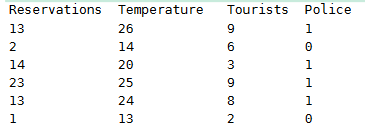

In [102]:
# Load the first 3 columns into X, and the last column into y
data = np.loadtxt(filepath + "police.txt", skiprows=1, unpack=False)

In [103]:
data[:5]

array([[13., 26.,  9.,  1.],
       [ 2., 14.,  6.,  0.],
       [14., 20.,  3.,  1.],
       [23., 25.,  9.,  1.],
       [13., 24.,  8.,  1.]])

In [105]:
# Extract the first 3 columns for X
X = data[:, :3]
X[:5]

array([[13., 26.,  9.],
       [ 2., 14.,  6.],
       [14., 20.,  3.],
       [23., 25.,  9.],
       [13., 24.,  8.]])

In [106]:
# Extract the last column for y
y = data[:, -1]
y[:5]

array([1., 0., 1., 1., 1.])

**prediction phase**

In linear regression, $\widehat{y}$ could take any value. 

In binary classification, $\widehat{y}$ must must be either 0 or 1. 

Here's an idea: maybe we can find a function that wraps around the weighted sum, and constrains it to the range from 0 to 1. Then, we can round the value, to be either 0 or 1.

In other words, the output of the model for a given observation, given a vector of input features $x$, can be interpreted as a probability, which serves as the basis for classifying the observation.

Such a function should:
* take an input — that is, any number — and squash it into the range from 0 to 1
* work well with gradient descent — should be smooth, without flat areas (where the gradient drops to zero) or gaps (where the gradient isn't even defined)

The logistic function 
$$ \sigma(z) = \frac{1}{1 + e^{-z}}$$
satisfies these requirements

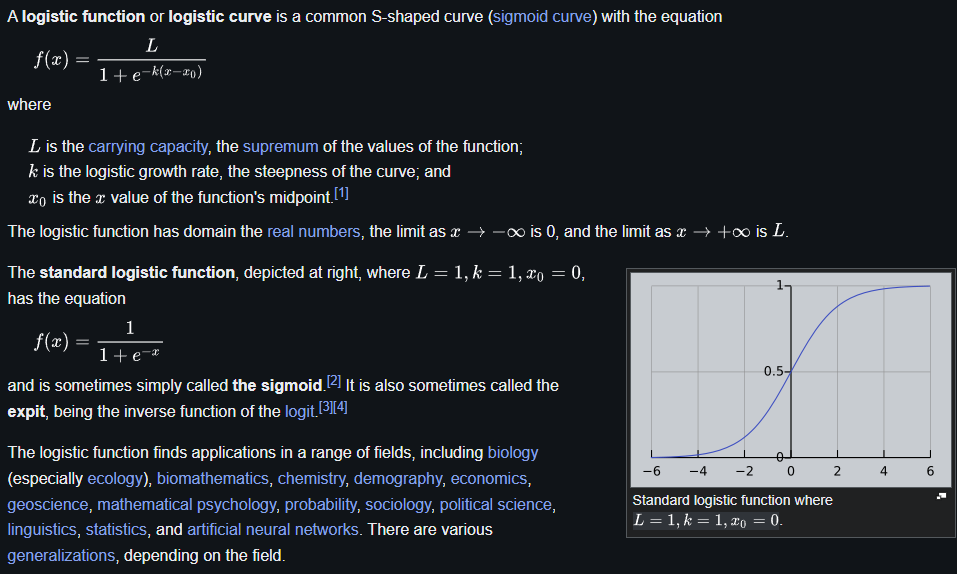

The probability of the output being 1, $y=1$ is given by $\widehat{y} = \sigma(w X) = \frac{1}{1 + e^{- w X}}$

The probability of the output being 0, $y=0$ is $1 - \widehat{y}$

In [107]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [108]:
# prediction code for regression. Here just for comparison
def predict(X, w):
    return np.matmul(X, w)

# the equivalent thing now for classification
def predict(X, w):
    weighted_sum = np.matmul(X, w)
    squashed = sigmoid(weighted_sum)
    rounded = np.round(squashed) # round to the nearest integer
    return rounded

in preparation for neural networks, we will divide the `predict` function into `foward` and `classify` instead

In [109]:
# forward propagation - the process of moving data through the system
def forward(X, w):
    weighted_sum = np.matmul(X, w) # or np.dot(X, w)
    return sigmoid(weighted_sum)

In [110]:
def classify(X, w):
    return np.round(forward(X, w))

**training phase**

because of the introduction of the wrapper function (sigmoid), the function we want to optimize (the loss function) needs to be changed, and so the gradient will change too

For now, let's assume it's given by this "log loss" function (called `binary cross-entropy loss`)

$$
L = -\frac{1}{n} \sum_{i=1}^n (y_i \; \log{\hat{y_i}} + (1 - y_i)\log{(1-\hat{y_i}))}
$$

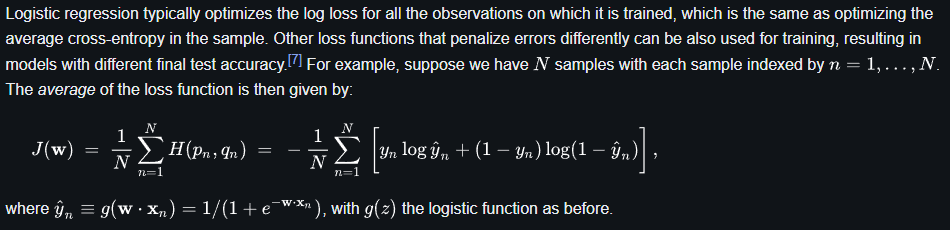

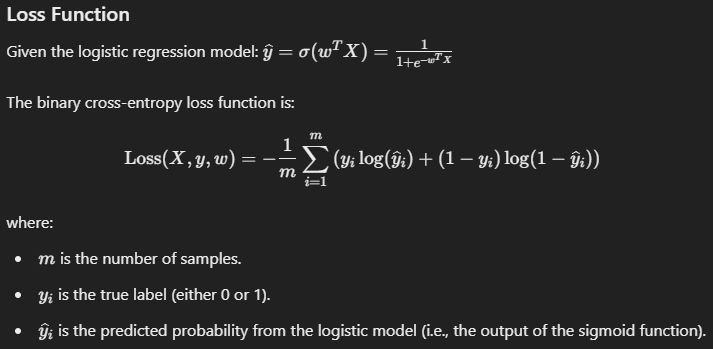

the gradient of the loss function with respect to the weight vector $w$

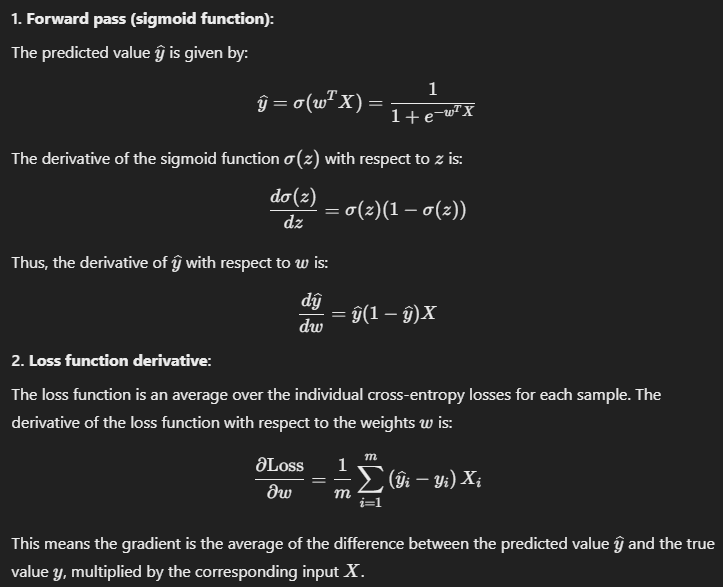

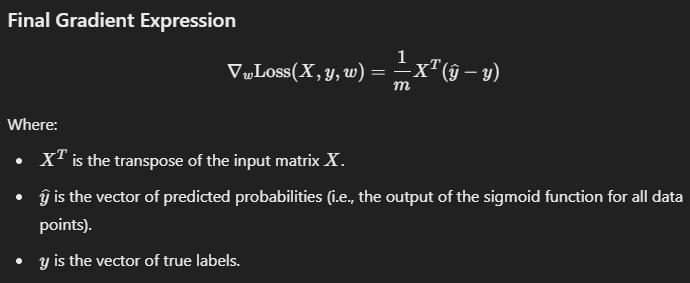

In [111]:
def loss(X, y, w):
    y_hat = forward(X, w)
    first_term = y * np.log(y_hat)
    second_term = (1 - y) * np.log(1 - y_hat)
    return -np.mean(first_term + second_term)

In [122]:
def gradient(X, y, w):
    # Forward pass to compute the predictions (y_hat)
    y_hat = forward(X, w)
    
    # Gradient of the binary cross-entropy loss
    return np.matmul(X.T, (y_hat - y)) / X.shape[0]

In [113]:
# this remains the same!
def train(X, y, iterations, lr, print_every=5000, tol=1e-6, patience=10):
   
    w = np.zeros((X.shape[1], 1))  # initialize weights
    best_loss = float('inf')  # keep track of the best loss
    no_improvement_count = 0  # count iterations without improvement
    
    for i in range(iterations):
        # Update weights
        w -= gradient(X, y, w) * lr
        
        # Calculate loss
        current_loss = loss(X, y, w)
        
        # Print loss every 'print_every' iterations
        if (i+1) % print_every == 0:
            print(f"Iteration {i+1}: Loss = {current_loss}")
        
        # Check for improvement in the loss
        if current_loss < best_loss - tol:
            best_loss = current_loss
            no_improvement_count = 0  # reset counter if improvement
        else:
            no_improvement_count += 1  # increment if no improvement
        
        # Early stopping condition
        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {i+1}: Best loss = {best_loss}")
            break
    
    return w

and now using this model...

In [130]:
data = np.loadtxt(filepath + "police.txt", skiprows=1, unpack=False)

In [131]:
X = data[:, :3]
y = data[:, -1]

In [132]:
# don't forget
X = np.column_stack((np.ones(X.shape[0]), X))
y = y.reshape(-1, 1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [134]:
print(X_train[:5])
print(y_train[:5])

[[ 1. 10. 21.  7.]
 [ 1.  8. 21. 10.]
 [ 1.  1. 13.  2.]
 [ 1.  6. 15.  4.]
 [ 1. 26. 24.  3.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [136]:
print(X_train.shape)
print(y_train.shape)

(22, 4)
(22, 1)


In [137]:
# obtain the weights by training
w = train(X_train, y_train, iterations=100000, lr=0.001)

Iteration 5000: Loss = 0.33817816721291566
Iteration 10000: Loss = 0.32955368596370604
Iteration 15000: Loss = 0.325555690736942
Iteration 20000: Loss = 0.3222444580604859
Iteration 25000: Loss = 0.31911267545813843
Iteration 30000: Loss = 0.31606944580333907
Iteration 35000: Loss = 0.3130956934754646
Iteration 40000: Loss = 0.3101864262213774
Iteration 45000: Loss = 0.30733954516735684
Iteration 50000: Loss = 0.30455355189379574
Iteration 55000: Loss = 0.3018270741099397
Iteration 60000: Loss = 0.29915877074248837
Iteration 65000: Loss = 0.29654731534162826
Iteration 70000: Loss = 0.2939913948470225
Iteration 75000: Loss = 0.291489710918343
Iteration 80000: Loss = 0.28904098142882095
Iteration 85000: Loss = 0.2866439417685478
Iteration 90000: Loss = 0.28429734595707806
Iteration 95000: Loss = 0.2819999676007801
Iteration 100000: Loss = 0.27975060072020447


In [138]:
w

array([[-2.42526495],
       [ 0.51445776],
       [-0.38336978],
       [ 0.65898273]])

make a prediction - for 10 reservations, 23 temperature, 7 tourists, will the police show up or not?

In [145]:
# make a prediction
# 10 reservations, 23 temperature, 7 tourists
# police shows up or not?
X_new = np.array([10, 23, 7])
X_new

array([10, 23,  7])

In [146]:
X_new = X_new.reshape(1, -1)
print(X_new.shape)
X_new

(1, 3)


array([[10, 23,  7]])

In [147]:
X_new = np.column_stack((np.ones(X_new.shape[0]), X_new))
print(X_new.shape)
X_new

(1, 4)


array([[ 1., 10., 23.,  7.]])

In [148]:
classify(X_new, w)

array([[0.]])

apparently, no

In [149]:
y_pred = classify(X_train, w)
print('Train set score - R^2 = %f' % r_squared(y_train, y_pred))

y_pred = classify(X_test, w)
print('Test set score - R^2 = %f' % r_squared(y_test, y_pred))

Train set score - R^2 = 0.636364
Test set score - R^2 = -1.000000


The performance on the test set is tragic, but on the training set seems more or less OK. This probably has to do with pre-processing, or we could be overfitting

For now, let's accept that and move on to dealing with multiple classes

**multiclass classification**

using the MNIST dataset

In [71]:
train_imgs, n_img, columns, rows = load_images("./data/mnist/train-images-idx3-ubyte.gz")

In [72]:
train_imgs.shape

(47040000,)

In [73]:
print(num_img)
print(columns)
print(rows)

60000
28
28


$X$ is supposed to have one line per example and one column per input variable, plus a bias column full of 1s. To fit MNIST’s images to this format, we can reshape each image to a single line of pixels, so that each pixel becomes an input variable. MNIST images are 28 by 28 pixels, so squashing them results in lines of 784 elements. Throw in the bias column, and that makes 785. So that’s what X should look like: a matrix of 60,000 lines (the number of examples) and 785 columns (one per pixel, plus the bias)

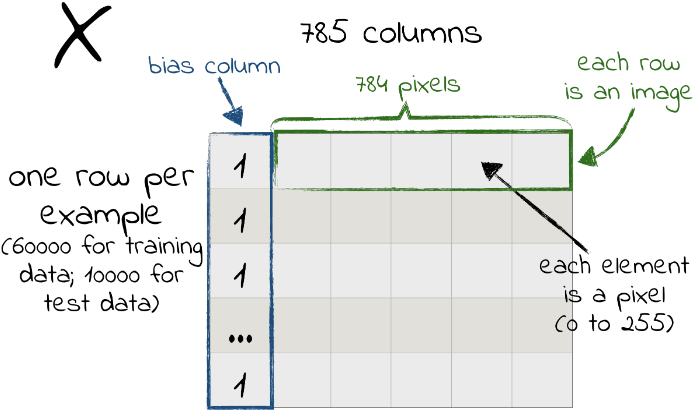

we squash each MNIST image into a row of the X matrix. You might have been scratching your head at this idea. Aren't we destroying the images by flattening them? What's the point of having handwritten digits if we grind them into meaningless rows of pixels? Indeed, we're performing a leap of faith here: we're trusting in the power of statistics. Even though the geometry of those digits is lost, we're betting that the distribution of their pixels is enough information to identify them. For example, the central pixels in a 7 are likely to be darker than the central pixels in a 0.

This method of looking at individual pixels would likely fail on more complicated data than MNIST. Later we'll describe a more powerful image recognition algorithm—one that focuses on shapes composed of multiple pixels

In [74]:
# Reshape the pixels into a matrix where each line is an image:
train_squashed = train_imgs.reshape(num_img, columns * rows)

In [75]:
train_squashed.shape

(60000, 784)

In [76]:
# Prepend bias
# Insert a column of 1s in the position 0 of X.
# ("axis=1" stands for: "insert a column, not a row")
X_train = np.insert(train_squashed, 0, 1, axis=1)

In [77]:
X_train.shape

(60000, 785)

In [69]:
# putting this into functions because they'll be used a lot...

In [70]:
def images2X(images_array, num_img, columns, rows):
    
    # Reshape the pixels into a matrix where each line is an image:
    squashed = images_array.reshape(num_img, columns * rows)

    # Prepend bias
    # Insert a column of 1s in the position 0 of X.
    # ("axis=1" stands for: "insert a column, not a row")
    return np.insert(squashed, 0, 1, axis=1)

In [79]:
# 60000 images, each 785 elements (1 bias + 28 * 28 pixels)
train_imgs, n_img, columns, rows = load_images("./data/mnist/train-images-idx3-ubyte.gz")
X_train = images2X(train_imgs, n_img, columns, rows)
# 10000 images, each 785 elements, with the same structure as X_train
test_imgs, n_img, columns, rows = load_images("./data/mnist/t10k-images-idx3-ubyte.gz") 
X_test = images2X(test_imgs, n_img, columns, rows)

For the labels $y$, previously it was a column of values that were either 0 or 1.

We could still use the same strategy to build a binary classifier that's hardwired to recognize a specific digit, such as 5. 

A `WSS (Weighted Sum plus Sigmoid)` is just like a binary classifier, minus the last step: instead of returning either 0 or 1, it returns a floating-point number between 0 and 1

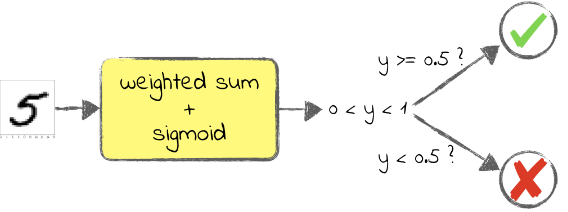

Now imagine building an array of ten WSSs, one per class—from the 0-WSS, that only recognizes zeros, to the 9-WSS that… well, you got the idea. If we run them all, then we get an array of ten numbers like this one

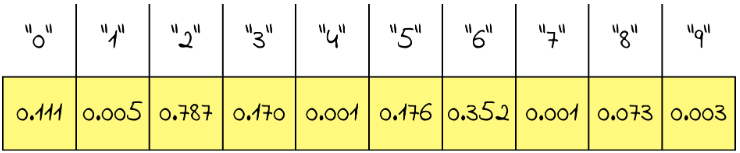

So, the plan is: 
* first, run ten WSSs on the image, each specialized for a different digit. 
* second, pick the digit that gets the highest confidence from its matching WSS.

And then we could implement this plan by running the same WSS code ten times, once per class.

However, a easier way to get the same result will be to encode each label using `one-hot encoding`

In this case, it means we will have one big matrix $Y$ with ten columns, where each column encodes a digit

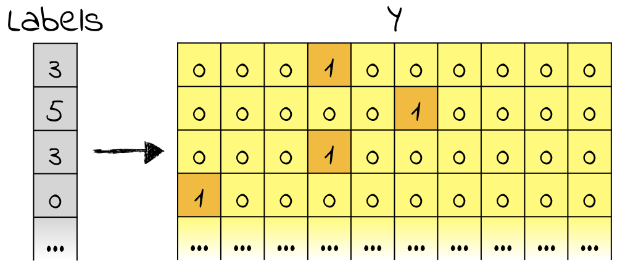

In this example, the first label is a 3, so the fourth cell in the first row of Y is a 1. (It's the fourth cell, not the third, since we're enumerating the digits starting from 0.) Similarly, each row has a 1 in the position matching its original label, and zeros everywhere else. This way of encoding labels is called one-hot encoding, because only one value per row is a hot 1. The rest are cold, cold zeros

One-hot encode any kind of categorical data. If our labels were, say, "duck", "platypus", and "tapir", then we could sort them in an arbitrary (but fixed) order, and encode them as `[1, 0, 0]`, `[0, 1, 0]`, and `[0, 0, 1]`, respectively.

In [86]:
def one_hot_encode(y):
    n_labels = y.shape[0]
    n_classes = 10
    encoded_Y = np.zeros((n_labels, n_classes))
    for i in range(n_labels):
        label = y[i]
        encoded_Y[i][label] = 1
    return encoded_Y

In [87]:
# 60K labels, each a single digit from 0 to 9
y_train_unencoded = load_labels("./data/mnist/train-labels-idx1-ubyte.gz")

In [89]:
y_train_unencoded.shape

(60000, 1)

In [90]:
# 60K labels, each consisting of 10 one-hot encoded elements
Y_train = one_hot_encode(y_train_unencoded)
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [91]:
Y_train.shape

(60000, 10)

we don't encode the test dataset

In [92]:
# 10000 labels, each a single digit from 0 to 9
y_test = load_labels("./data/mnist/t10k-labels-idx1-ubyte.gz")

in the prediction phase, now instead of rounding to the nearest integer (0 or 1), we need to see which column got the higher prediction, and set that as the label

in the training phase, when we introduced one-hot encoding, we extended the matrix of labels from one to ten columns. We need to do the same with the weights, so it also becomes a matrix

In [124]:
# binary classifier, for comparison
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid(z):
    # Clip z to avoid overflow in np.exp
    z = np.clip(z, -500, 500)  # Prevent large values in np.exp # <--------------------- CHANGE
    return 1 / (1 + np.exp(-z))

In [125]:
# binary classifier, for comparison
def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

def forward(X, W):
    weighted_sum = np.matmul(X, W)
    return sigmoid(weighted_sum)

In [126]:
# binary classifier, for comparison
def classify(X, w):
    return np.round(forward(X, w))

def classify(X, W):
    # Step 1: Calculate the predicted probabilities
    Y_hat = forward(X, W)
    
    # Step 2: Find the class with the highest probability for each sample
    labels = np.argmax(Y_hat, axis=1)
    
    # Step 3: Reshape the output to a column vector
    return labels.reshape(-1, 1)

In [127]:
# binary classifier, for comparison
def loss(X, y, w):
    y_hat = forward(X, w)
    first_term = y * np.log(y_hat)
    second_term = (1 - y) * np.log(1 - y_hat)
    return -np.mean(first_term + second_term)

def loss(X, Y, W):
    Y_hat = forward(X, W)
    
    # Clip the predicted probabilities to avoid log(0)
    Y_hat = np.clip(Y_hat, 1e-15, 1 - 1e-15) # <--------------------- CHANGE
    
    first_term = Y * np.log(Y_hat)
    second_term = (1 - Y) * np.log(1 - Y_hat)
    return -np.sum(first_term + second_term) / X.shape[0] # <--------------------- CHANGE
    # average over all the lines in the matrix

In [128]:
def gradient(X, Y, W):
    # Forward pass to compute the predictions (y_hat)
    Y_hat = forward(X, W)
    
    # Gradient of the binary cross-entropy loss
    return np.matmul(X.T, Y_hat - Y) / X.shape[0]

In [129]:
# binary classifier, for comparison
def train(X, y, iterations, lr, print_every=5000, tol=1e-6, patience=10):
   
    w = np.zeros((X.shape[1], 1))  # initialize weights
    best_loss = float('inf')  # keep track of the best loss
    no_improvement_count = 0  # count iterations without improvement
    
    for i in range(iterations):
        # Update weights
        w -= gradient(X, y, w) * lr
        
        # Calculate loss
        current_loss = loss(X, y, w)
        
        # Print loss every 'print_every' iterations
        if (i+1) % print_every == 0:
            print(f"Iteration {i+1}: Loss = {current_loss}")
        
        # Check for improvement in the loss
        if current_loss < best_loss - tol:
            best_loss = current_loss
            no_improvement_count = 0  # reset counter if improvement
        else:
            no_improvement_count += 1  # increment if no improvement
        
        # Early stopping condition
        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {i+1}: Best loss = {best_loss}")
            break
    
    return w

def train(X, Y, iterations, lr, print_every=5000, tol=1e-6, patience=10):
   
    W = np.zeros((X.shape[1], Y.shape[1]))  # <--------------------- CHANGE
    best_loss = float('inf')  # keep track of the best loss
    no_improvement_count = 0  # count iterations without improvement
    
    for i in range(iterations):
        # Update weights
        W -= gradient(X, Y, W) * lr
        
        # Calculate loss
        current_loss = loss(X, Y, W)
        
        # Print loss every 'print_every' iterations
        if (i+1) % print_every == 0:
            print(f"Iteration {i+1}: Loss = {current_loss}")
        
        # Check for improvement in the loss
        if current_loss < best_loss - tol:
            best_loss = current_loss
            no_improvement_count = 0  # reset counter if improvement
        else:
            no_improvement_count += 1  # increment if no improvement
        
        # Early stopping condition
        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {i+1}: Best loss = {best_loss}")
            break
    
    return W

In [130]:
W = train(X_train, Y_train, iterations=100000, lr=0.001)

Early stopping at iteration 36: Best loss = 9.534443694772428


In [131]:
W

array([[-2.32403887e-04, -2.36005502e-05, -1.90209793e-04, ...,
        -2.15706128e-05, -6.43717101e-04, -3.82522869e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

I clipped
* z in the sigmoid to avoid overflow in np.exp
* the probabilities in the loss function: to ensure that the predicted probabilities do not go all the way to 0 or 1, avoiding issues with the log function

However, I'm probably doing something wrong, because these weights don't look good at all

In [132]:
classify(X_test, W)

array([[7],
       [2],
       [1],
       ...,
       [4],
       [8],
       [6]])

In [136]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

y_pred = classify(X_train, W)
print('Train set score - R^2 = %f' % r_squared(y_train_unencoded, y_pred))

y_pred = classify(X_test, W)
print('Test set score - R^2 = %f' % r_squared(y_test, y_pred))

Train set score - R^2 = 0.567931
Test set score - R^2 = 0.568203


In [ ]:
# TODO - look into why this is doing so bad later

## Perceptron

In [ ]:
# TODO

## other linear models

### Ridge regression

In [136]:
# TODO

### regressors with variable selection

these estimators have built-in variable selection fitting procedures

#### Lasso

In [137]:
# TODO

#### ElasticNet

In [ ]:
# TODO

### Ridge classifier

In [ ]:
# TODO